Source: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

https://www.geeksforgeeks.org/cifar-10-image-classification-in-tensorflow/?id=discuss

https://www.geeksforgeeks.org/python-image-classification-using-keras/

In [2]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
  
img_width, img_height = 224, 224

In [2]:
'''
from google.colab import drive
import os
# Menyambungkan google colab dengan google drive
drive.mount('/content/drive/')
'''

"\nfrom google.colab import drive\nimport os\n# Menyambungkan google colab dengan google drive\ndrive.mount('/content/drive/')\n"

In [3]:
'''
base_dir = '/content/drive/My Drive/Chess'
!ls '/content/drive/My Drive/Chess'
'''

"\nbase_dir = '/content/drive/My Drive/Chess'\n!ls '/content/drive/My Drive/Chess'\n"

In [4]:
'''
# menentukan direktori
train_data_dir = os.path.join(base_dir, 'Train')
validation_data_dir = os.path.join(base_dir, 'Validation')
#test_dir = os.path.join(base_dir, 'Test')
'''

"\n# menentukan direktori\ntrain_data_dir = os.path.join(base_dir, 'Train')\nvalidation_data_dir = os.path.join(base_dir, 'Validation')\n#test_dir = os.path.join(base_dir, 'Test')\n"

In [3]:
!unzip v_data.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
train_data_dir = 'v_data/train'
validation_data_dir = 'v_data/test'
nb_train_samples = 400
nb_validation_samples = 100
epochs = 20
batch_size = 16

In [5]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [6]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
  
test_datagen = ImageDataGenerator(rescale=1. / 255)
  
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
  
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/20
25/25 [==============================] - 47s 2s/step - loss: 0.7010 - accuracy: 0.6500 - val_loss: 0.3984 - val_accuracy: 0.8750
Epoch 2/20
25/25 [==============================] - 37s 1s/step - loss: 0.4794 - accuracy: 0.8025 - val_loss: 0.3288 - val_accuracy: 0.8854
Epoch 3/20
25/25 [==============================] - 36s 1s/step - loss: 0.4268 - accuracy: 0.8500 - val_loss: 0.6559 - val_accuracy: 0.7396
Epoch 4/20
25/25 [==============================] - 38s 2s/step - loss: 0.3742 - accuracy: 0.8600 - val_loss: 0.3068 - val_accuracy: 0.8750
Epoch 5/20
25/25 [==============================] - 40s 2s/step - loss: 0.3506 - accuracy: 0.8575 - val_loss: 0.4613 - val_accuracy: 0.7917
Epoch 6/20
25/25 [==============================] - 38s 2s/step - loss: 0.3212 - accuracy: 0.8575 - val_loss: 0.4751 - val_accuracy: 0.8333
Epoch 7/20
25/25 [==============================] - 39s 2s/step - loss: 0.2990

In [10]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
conf_matrix = confusion_matrix(validation_generator.classes, y_pred)
print(conf_matrix)

print('Classification Report')
target_names = ['Car', 'Plane']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

7/7 [==============================] - 3s 390ms/step
Confusion Matrix
[[50  0]
 [50  0]]
Classification Report
              precision    recall  f1-score   support

         Car       0.50      1.00      0.67        50
       Plane       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100



c:\Users\Indah Wardatunizza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Indah Wardatunizza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Indah Wardatunizza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

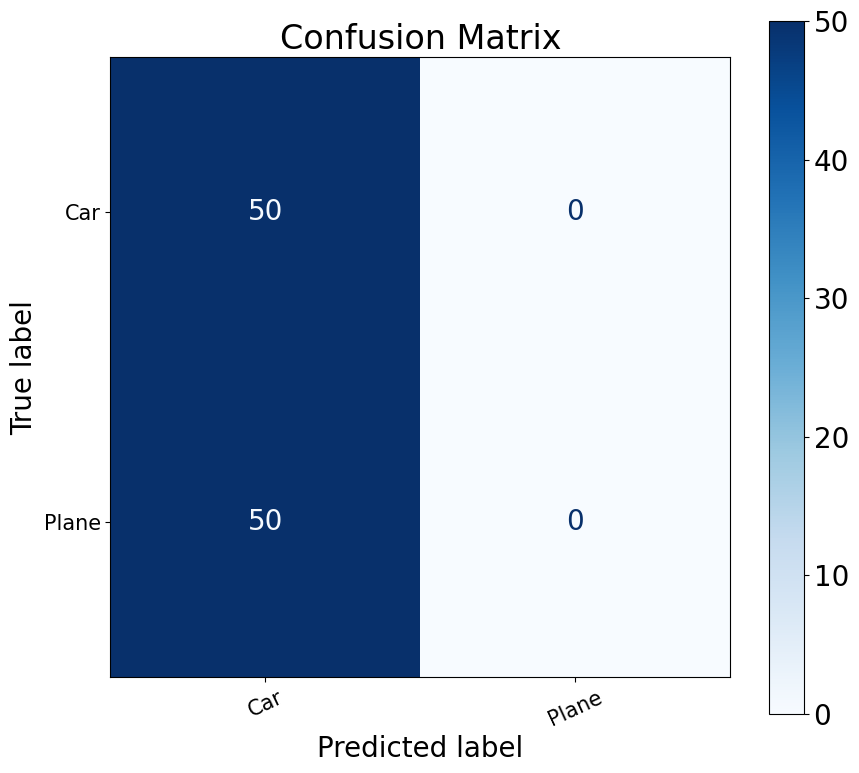

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_conf_matrix = ConfusionMatrixDisplay(conf_matrix, display_labels=target_names)


# Plotting Confusion Matrix
# Setting colour map to be used
display_conf_matrix.plot(cmap='Blues', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)


# Showing the plot
plt.show()

In [12]:
loss, accuracy = model.evaluate(validation_generator)
print('Test accuracy:' , accuracy * 100,'%')

7/7 [==============================] - 2s 317ms/step - loss: 0.2957 - accuracy: 0.8800
Test accuracy: 87.99999952316284 %


In [9]:
model.save_weights('model_saved.h5')
model.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x0000024153992B30>>

In [10]:
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
  
from keras.models import load_model

#model = load_model('model_saved.h5')
  
image = load_img('Tesla.png', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
if label[0][0] > 0.5:
    print('Plane')
else:
    print('Car')
#print("Predicted Class (0 - Cars , 1- Planes): ", label[0][0])

1/1 [==============================] - 0s 420ms/step
Car
